In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#TERKUNCI

import os
import random
import shutil

def create_directories(base_path):
    # Membuat jalur directori
    train_dir = os.path.join(base_path, 'train')
    validation_dir = os.path.join(base_path, 'validation')
    test_dir = os.path.join(base_path, 'test')

    # Membuat Directori
    for directory in [train_dir, validation_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Membuat Kelas pada data set
    for Hutan in ['Fire', 'None', 'Smoke', 'Smoke and Fire']:
        for directory in [train_dir, validation_dir, test_dir]:
            Hutan_dir = os.path.join(directory, Hutan)
            if not os.path.exists(Hutan_dir):
                os.makedirs(Hutan_dir)

def split_data(source_dir, dest_dir, split_ratio=(0.7, 0.2, 0.1), seed=42):
    classes = ['Fire', 'None', 'Smoke', 'Smoke and Fire']

    random.seed(42)

    for class_name in classes:
        class_dir = os.path.join(source_dir, class_name)

        if not os.path.exists(class_dir):
            print(f"Warning: Directory {class_dir} does not exist. Skipping.")
            continue

        images = os.listdir(class_dir)
        if len(images) == 0:
            print(f"Warning: No images found in {class_dir}. Skipping.")
            continue

        random.shuffle(images)  # Pengacakan terkunci

        total_images = len(images)
        train_split = int(split_ratio[0] * total_images)
        validation_split = int(split_ratio[1] * total_images)

        train_images = images[:train_split]
        validation_images = images[train_split:train_split + validation_split]
        test_images = images[train_split + validation_split:]

        # Memindahkan File
        for img in train_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(dest_dir, 'train', class_name, img)
            try:
                shutil.copy(src, dst)
            except Exception as e:
                print(f"Error copying {src} to {dst}: {e}")
        for img in validation_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(dest_dir, 'validation', class_name, img)
            try:
                shutil.copy(src, dst)
            except Exception as e:
                print(f"Error copying {src} to {dst}: {e}")
        for img in test_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(dest_dir, 'test', class_name, img)
            try:
                shutil.copy(src, dst)
            except Exception as e:
                print(f"Error copying {src} to {dst}: {e}")

source_directory = "/kaggle/input/big-data-competition-statistics-explore-2024/Train Data/Train Data"
destination_directory = "/kaggle/working/datasets"
create_directories(destination_directory)
split_data(source_directory, destination_directory)

In [ ]:
def count_items_in_directory(directory):
    item_count = 0
    for root, dirs, files in os.walk(directory):
        item_count += len(files)
    return item_count

def count_items(base_path):
    categories = ['train', 'validation', "test"]
    classes = ['Fire', 'None', 'Smoke', 'Smoke and Fire']

    for category in categories:
        print(f"--- {category.capitalize()} Data ---")
        category_path = os.path.join(base_path, category)
        for class_name in classes:
            class_path = os.path.join(category_path, class_name)
            if os.path.exists(class_path):
                num_items = count_items_in_directory(class_path)
                print(f"{class_name.capitalize()}: {num_items} images")
            else:
                print(f"{class_name.capitalize()}: Directory does not exist")

#Defini datasumber
base_path = '/kaggle/working/datasets'
count_items(base_path)

In [ ]:
from PIL import Image

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)  # Coba buka gambar
                img.verify()  # Verifikasi apakah ini gambar yang valid
            except (IOError, Image.UnidentifiedImageError) as e:
                print(f"File tidak valid ditemukan: {img_path}, Error: {e}")

# memeriksa semua dataset
check_images_in_directory("/kaggle/working/datasets/train")
check_images_in_directory("/kaggle/working/datasets/validation")
check_images_in_directory("/kaggle/working/datasets/test")

In [ ]:
def remove_invalid_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()
            except (IOError, Image.UnidentifiedImageError):
                print(f"Menghapus file yang rusak: {file_path}")
                os.remove(file_path)

# Menghapus gambar yang tidak valid dari direktori
remove_invalid_images('/kaggle/working/datasets/train')
remove_invalid_images('/kaggle/working/datasets/validation')
remove_invalid_images('/kaggle/working/datasets/test')


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# **TRAINING**

In [78]:
!yolo task=classify mode=train model=yolov8m-cls.pt data=/kaggle/working/datasets epochs=10 imgsz=256

Ultralytics YOLOv8.2.90 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/kaggle/working/datasets, epochs=10, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

# **VALIDATION**

In [79]:
!yolo task=classify mode=val 
model="runs/classify/train9/weights/best.pt" 
data="/kaggle/working/datasets"

WARNING ⚠️ 'data' argument is missing. Using default 'data=imagenet10'.
Ultralytics YOLOv8.2.90 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-cls summary (fused): 73 layers, 2,715,880 parameters, 0 gradients, 4.3 GFLOPs
train: /kaggle/working/datasets/imagenet10/train... found 12 images in 10 classes ✅ 
val: /kaggle/working/datasets/imagenet10/val... found 12 images in 10 classes ✅ 
test: None...
val: Scanning /kaggle/working/datasets/imagenet10/val... 12 images, 0 corrupt: 1
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,
                   all       0.25        0.5
Speed: 0.1ms preprocess, 4.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val10
💡 Learn more at https://docs.ultralytics.com/modes/val


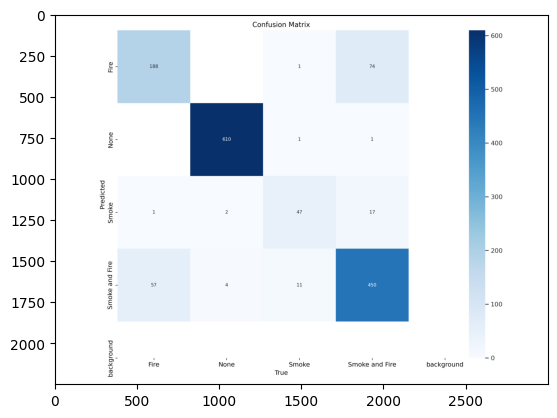

In [80]:
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

yolo_result_csv = "/kaggle/working/runs/classify/train9/results.csv"

pd.read_csv(yolo_result_csv).head(20)

img= Image.open('/kaggle/working/runs/classify/train9/confusion_matrix.png')
plt.imshow(img)

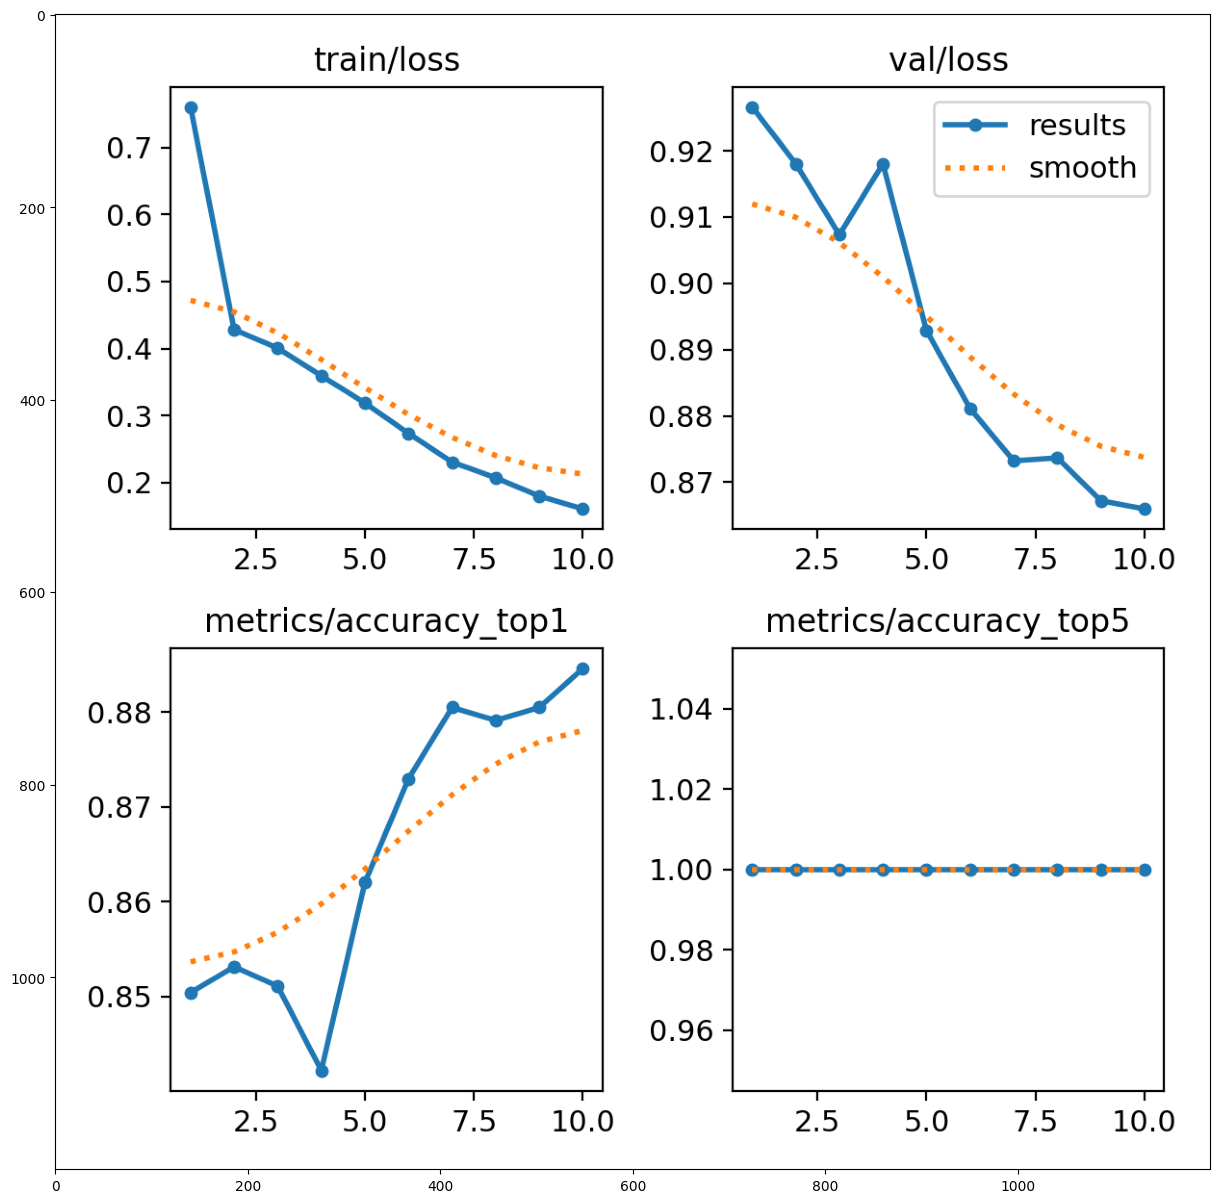

In [81]:
from PIL import Image

yolo_result_img = "/kaggle/working/runs/classify/train9/results.png"
yolo_result_img = Image.open(yolo_result_img)

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 15))
plt.imshow(yolo_result_img)
plt.show()

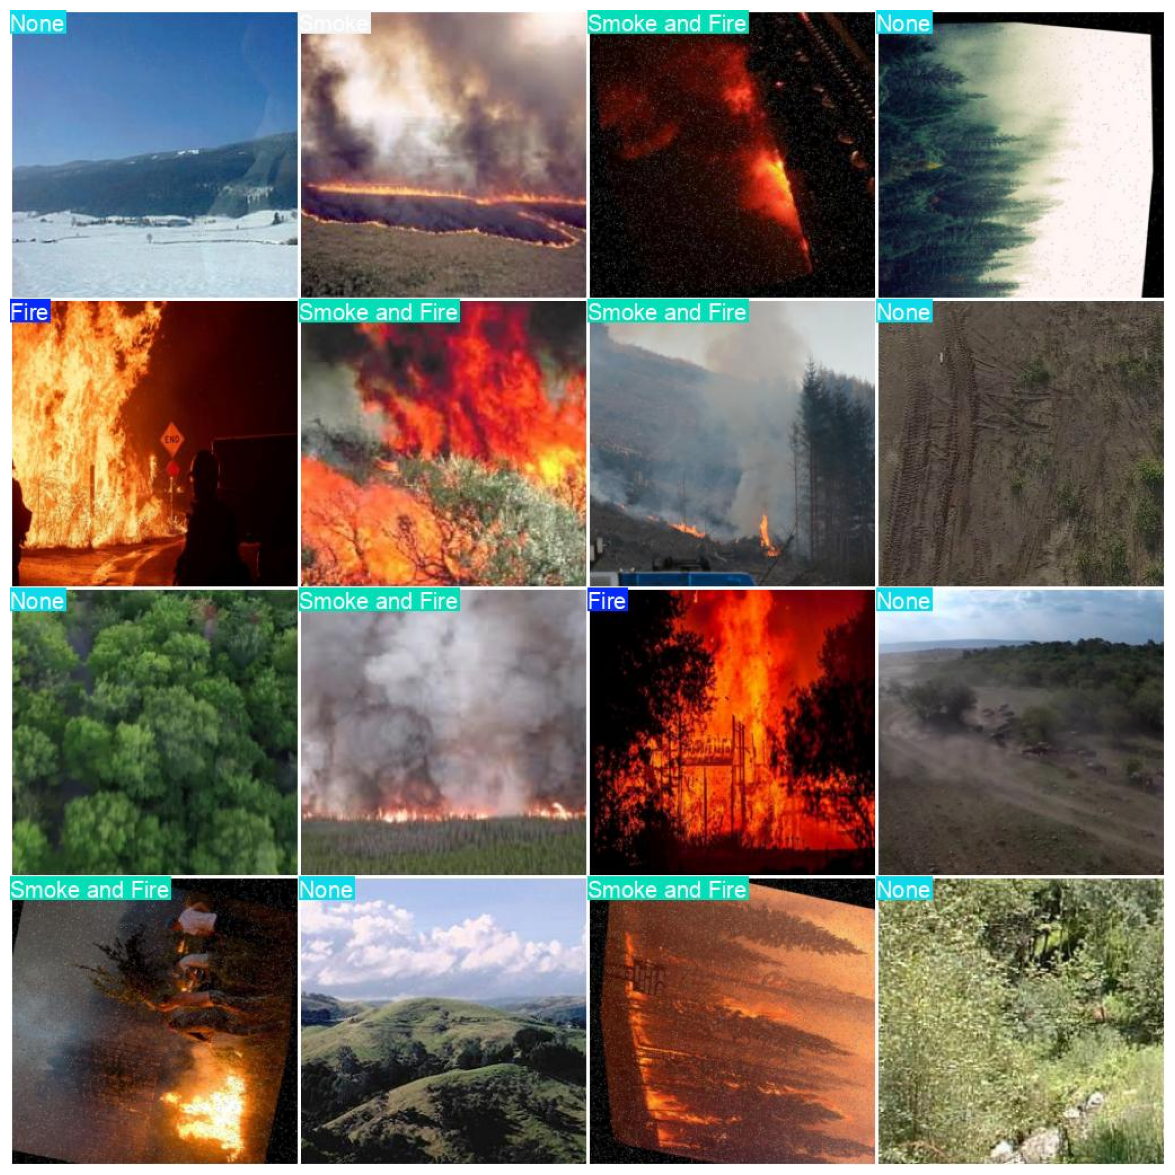

In [82]:
yolo_pred_img = "/kaggle/working/runs/classify/train9/val_batch1_pred.jpg"
yolo_pred_img = Image.open(yolo_pred_img)

plt.figure(figsize = (15, 15))
plt.imshow(yolo_pred_img)
plt.axis("off");

In [83]:
!yolo task=classify mode=predict 
model="/kaggle/working/runs/classify/train9/weights/best.pt"
conf=0.25 
source="/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK"

WARNING ⚠️ 'source' argument is missing. Using default 'source=/opt/conda/lib/python3.10/site-packages/ultralytics/assets'.
Ultralytics YOLOv8.2.90 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-cls summary (fused): 73 layers, 2,715,880 parameters, 0 gradients, 4.3 GFLOPs

image 1/2 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 224x224 minibus 0.50, police_van 0.29, trolleybus 0.05, golfcart 0.02, jinrikisha 0.02, 2.9ms
image 2/2 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 224x224 bow_tie 0.24, cornet 0.10, suit 0.06, stage 0.05, oboe 0.05, 3.0ms
Speed: 11.9ms preprocess, 2.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [84]:
# Load YOLOv8 model
model = YOLO('/kaggle/working/runs/classify/train9/weights/best.pt')
results = model('/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK')  # predict on an image
names_dict = results[0].names
probs = results[0].probs.data.tolist()
print(names_dict)
print(probs)
print(names_dict[np.argmax(probs)])


image 1/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_1.jpg: 256x256 Fire 0.85, Smoke and Fire 0.15, Smoke 0.00, None 0.00, 4.4ms
image 2/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_10.jpg: 256x256 Fire 0.95, Smoke and Fire 0.05, None 0.00, Smoke 0.00, 4.3ms
image 3/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_100.jpg: 256x256 None 0.97, Smoke and Fire 0.01, Smoke 0.01, Fire 0.00, 4.3ms
image 4/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_101.jpg: 256x256 Fire 0.55, Smoke and Fire 0.45, Smoke 0.00, None 0.00, 4.4ms
image 5/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_102.jpg: 256x256 Fire 0.99, Smoke and Fire 0.01, None 0.00, Smoke 0.00, 4.3ms
image 6/543 /kaggle/input/big-data-competition-statistics-explore-2

In [ ]:
import os
import csv
import numpy as np

test = "/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK"

# Get a list of all image files in the folder
image_files = [os.path.join(test, f) 
               for f in os.listdir(test) if f.endswith('.jpg')]

# Create a CSV writer
with open('submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id", "Prediction"])  # header row

    # Loop over the image files and make predictions
    for image_file in image_files:
        results = model(image_file)  # predict on an image
        names_dict = results[0].names
        probs = results[0].probs.data.tolist()
        prediction_index = np.argmax(probs)
        prediction_name = names_dict[prediction_index]

        # Map the prediction names to the desired class labels
        if prediction_name == 'None':
            prediction = '1'
        elif prediction_name == 'Fire':
            prediction = '2'
        elif prediction_name == 'Smoke':
            prediction = '3'
        elif prediction_name == 'Smoke and Fire':
            prediction = '4'

        # Extract the image ID from the file name
        image_id = os.path.basename(image_file).split('.')[0]

        # Write the prediction to the CSV file
        writer.writerow([image_id, prediction])



# Get the current working directory
cwd = os.getcwd()

# Load the sample submission file
with open(os.path.join(cwd, '/kaggle/input/big-data-competition-statistics-explore-2024/sample_submission.csv'), 'r') as sample_csvfile:
    reader = csv.reader(sample_csvfile)
    sample_submission = [row for row in reader]


# Load the submission5.csv file
with open('/kaggle/working/submission.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    submission5 = [row for row in reader]

# Merge the two files based on the image ID
merged_submission = []
for sample_row in sample_submission[1:]:  # skip the header row
    image_id = sample_row[0]
    for submission_row in submission5[1:]:  # skip the header row
        if submission_row[0] == image_id:
            merged_submission.append([image_id, submission_row[1]])
            break

# Write the merged submission to a new CSV file
with open('fix21_submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id", "Prediction"])  # header row
    writer.writerows(merged_submission)


image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_262.jpg: 256x256 Smoke and Fire 0.52, Fire 0.48, Smoke 0.00, None 0.00, 4.4ms
Speed: 5.7ms preprocess, 4.4ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_422.jpg: 256x256 None 1.00, Smoke 0.00, Smoke and Fire 0.00, Fire 0.00, 4.7ms
Speed: 5.7ms preprocess, 4.7ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_98.jpg: 256x256 Smoke 0.84, Smoke and Fire 0.16, Fire 0.00, None 0.00, 4.5ms
Speed: 5.3ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_385.jpg: 256x256 Fire 0.92, Smoke and Fire 0.08